In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.base import clone
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, LeaveOneOut, GridSearchCV

/users/2024/ds2/122003362/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


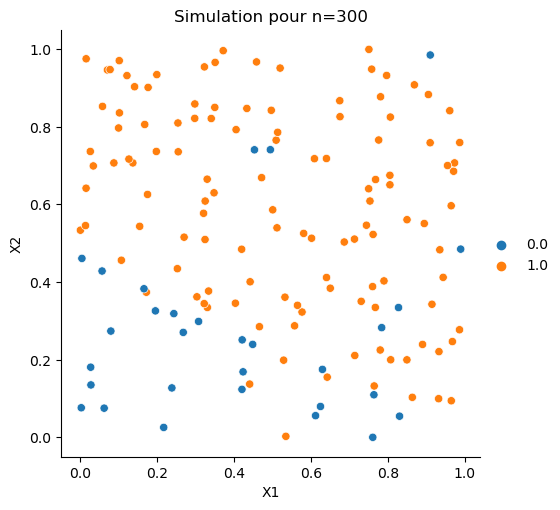

In [2]:
#Correction prof
def simu(n, alpha, beta, display=False):
    """Simule et affiche un echantillon de taille n.
    Renvoie les jeux d'entrainement/test avec les étiquettes dissociées.
    """
    if (alpha>1) | (alpha<0) | (beta>1) | (beta<0):
        raise ValueError('Les paramètres alpha et beta doivent être compris entre 0 et 1.')
    
    X = np.random.uniform(0, 1, (n,2))
    Y = np.zeros((n,))
    part1 = np.absolute(X[:,0] + 2*X[:,1]) <= 1
    Y[part1] = np.random.binomial(1, alpha, len(Y[part1]))
    Y[~part1] = np.random.binomial(1, beta, len(Y[~part1]))
    
    X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=.5)
    
    if display == True:
        df = pd.DataFrame(X_train)
        df.columns=['col1', 'col2']
        sns.relplot(data=df,x='col1', y='col2', hue=y_train).set(
            title=f"Simulation pour n={X.shape[0]}", xlabel="X1", ylabel="X2")
    
    return  X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test=simu(300, .1, .9,display=True)

# Question 1, 2 et 3

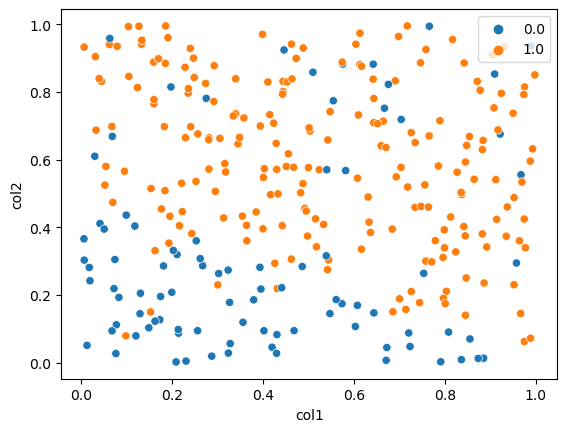

Xtrain:
 [[7.66029540e-01 5.11072035e-01]
 [7.00787626e-01 3.70041180e-01]
 [7.26250947e-01 2.94979575e-01]
 [4.67913916e-01 8.92796023e-04]
 [8.17238534e-01 8.75433522e-01]
 [3.99556393e-01 6.24896302e-01]
 [5.80239723e-01 5.42701220e-01]
 [9.27862166e-01 7.41030209e-01]
 [1.75555923e-01 7.68137220e-01]
 [8.40469447e-01 1.47715405e-01]
 [3.24441169e-01 2.16926013e-01]
 [5.34793143e-01 7.60714647e-01]
 [4.03882840e-01 4.36525219e-01]
 [6.01573951e-01 1.82203541e-01]
 [1.37563939e-01 5.04907185e-01]
 [6.62395743e-02 9.29594790e-01]
 [7.98451798e-01 6.00631631e-01]
 [9.75142947e-01 5.45982344e-01]
 [5.52061429e-01 9.91203709e-01]
 [9.52224733e-01 2.16862800e-03]
 [1.99144503e-01 7.89208944e-01]
 [9.00338614e-01 1.77284020e-01]
 [5.38795637e-01 3.04841641e-01]
 [9.69014855e-01 8.14693940e-01]
 [6.83040425e-01 5.34497737e-02]
 [5.98232056e-01 9.38990099e-02]
 [1.54611944e-01 8.75129702e-01]
 [3.55363530e-01 5.44820920e-01]
 [9.95051447e-01 5.86685094e-01]
 [4.33429137e-01 2.94882948e-03]
 

In [3]:
def simu(n, alpha, beta,display=False):
    """Simule et affiche un echantillon de taille n.
    Renvoie les jeux d'entrainement/test avec les étiquettes dissociées.
    """
    if (alpha>1) | (alpha<0) | (beta>1) | (beta<0):
        raise ValueError('Les paramètres alpha et beta doivent être compris entre 0 et 1.')
        ## Utiliser sns.relplot pour la partie graphique
    X=np.random.uniform(0, 1,(n,2))
    Y=np.zeros((n,))
    part1=X[:,0]+2*X[:,1]<=1
    Y[part1]=np.random.uniform(0,1,len(Y[part1]))<=alpha
    Y[~part1]=np.random.uniform(0,1,len(Y[~part1]))<=beta
    if display==True:
        df=pd.DataFrame(X)
        df.columns=['col1','col2']
        sns.scatterplot(data=df,x="col1",y="col2",hue=Y)
        plt.show()
    return X,Y
simu(300, .1, .9, display=True)

from sklearn.model_selection import train_test_split
X,Y=simu(300, .1, .9)
trainsize = 0.75  # Proportion d'entraînement
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.75, random_state=42)
print("Xtrain:\n", X_train)
print("Ytrain:\n", Y_train)
print("Xtest:\n", X_test)
print("Ytest:\n", Y_test)

Exercice : programmer "à la main" la fonction train_test_split

In [4]:
def traintestsplitalamain(X,Y,trainsize):
    ## prend en entrée une matrice X de taille n x p
    ## et un vecteur Y de taille n
    ## trainsize désigne la proportion de données attribuées à l'entraînement
    ## renvoie Xtrain, Xtest, Ytrain, Ytest
    # Vérification des dimensions
    assert X.shape[0] == Y.shape[0], "Le nombre d'échantillons dans X et Y doit être le même"

    # Calcul du nombre d'échantillons pour l'entraînement
    n_train = int(trainsize * X.shape[0])

    # Sélection aléatoire des indices d'entraînement
    indices_train = np.random.choice(X.shape[0], n_train, replace=False)

    # Indices pour les données de test
    indices_test = np.setdiff1d(np.arange(X.shape[0]), indices_train)

    # Séparation des données d'entraînement et de test
    Xtrain, Xtest = X[indices_train, :], X[indices_test, :]
    Ytrain, Ytest = Y[indices_train], Y[indices_test]

    return Xtrain, Xtest, Ytrain, Ytest

X,Y=simu(300, .1, .9)
trainsize = 0.75  # Proportion d'entraînement
Xtrain, Xtest, Ytrain, Ytest = traintestsplitalamain(X, Y, trainsize)
print("Xtrain:\n", Xtrain)
print("Ytrain:\n", Ytrain)
print("Xtest:\n", Xtest)
print("Ytest:\n", Ytest)

Xtrain:
 [[0.75614263 0.9324989 ]
 [0.477995   0.4057042 ]
 [0.61019163 0.83528357]
 [0.16223157 0.52849118]
 [0.38354778 0.43837781]
 [0.91602891 0.29237461]
 [0.13451412 0.66685272]
 [0.97585582 0.35777478]
 [0.66835633 0.94271311]
 [0.27200759 0.85621084]
 [0.37523882 0.37801053]
 [0.80289587 0.13658145]
 [0.69965649 0.59698752]
 [0.66363894 0.24000758]
 [0.39196283 0.57490546]
 [0.64971611 0.16683378]
 [0.76718135 0.67568876]
 [0.64744056 0.92252229]
 [0.65617604 0.47434298]
 [0.34742636 0.59126992]
 [0.48375737 0.08421676]
 [0.49961107 0.70274024]
 [0.63275654 0.73424316]
 [0.44050015 0.93520399]
 [0.50144035 0.972419  ]
 [0.1576255  0.32764887]
 [0.79958318 0.90499725]
 [0.10754676 0.90245014]
 [0.1693542  0.31383017]
 [0.20402163 0.8864004 ]
 [0.56222616 0.89390844]
 [0.59921658 0.56061123]
 [0.65348601 0.04157477]
 [0.64871324 0.0161145 ]
 [0.80730906 0.51362646]
 [0.99147663 0.78114858]
 [0.37025021 0.22994789]
 [0.05705327 0.04937257]
 [0.6235156  0.80378164]
 [0.86346503 0.2

/users/2024/ds2/122003362/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


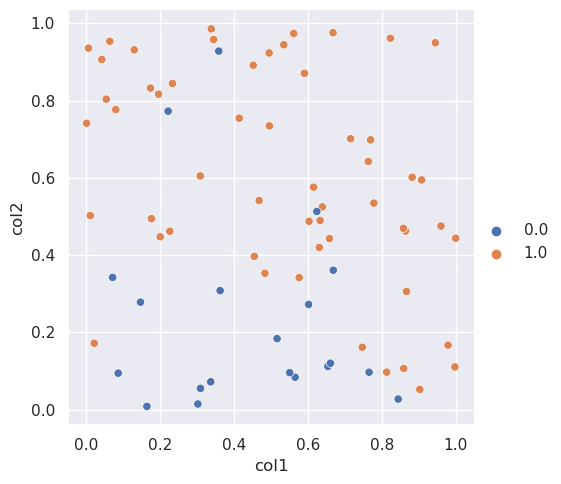

In [5]:
X,Y=simu(300, .1, .9)
trainsize = 0.75  # Proportion d'entraînement
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.75, random_state=42)
sns.set_theme()
# Create a visualization
df=pd.DataFrame(X_train)
df.columns=['col1','col2']
sns.relplot(
    data=df,
    x="col1", y="col2",hue=Y_train)

# Question 4

Consulter la classe KNeighborsClassifier de sklearn

In [6]:
k=20
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, Y_train)
points_to_predict = [[1/2, 1/2], [1/4, 3/4]]
predictions = knn.predict(points_to_predict)
for point, prediction in zip(points_to_predict, predictions):
    print(f"Coordonnées du point : {point} | Prédiction de classe : {prediction}")

Coordonnées du point : [0.5, 0.5] | Prédiction de classe : 1.0
Coordonnées du point : [0.25, 0.75] | Prédiction de classe : 1.0


# Question 5, 6, 7 et 8

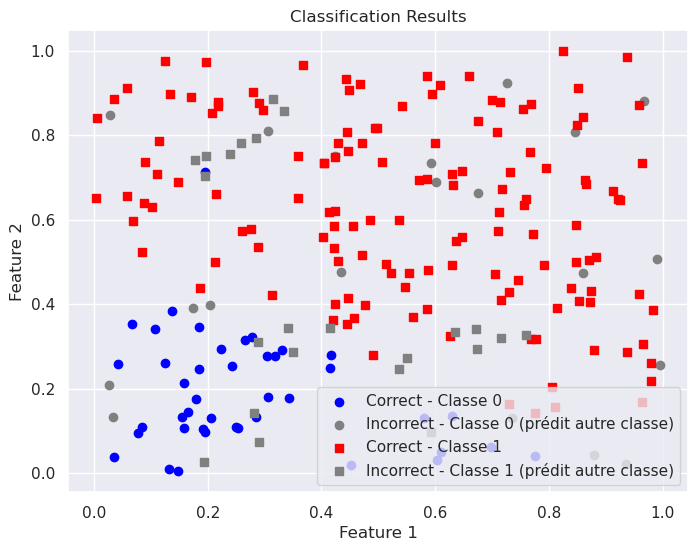

Matrice de confusion :
 [[ 42  20]
 [ 23 140]]
Précision du modèle : 0.8088888888888889


0.8088888888888889

In [7]:
# Fonction pour tracer les points bien/mal classés
def plot_classification_results(X, y_true, y_pred, title):
    plt.figure(figsize=(8, 6))
    
    markers = ['o', 's']
    colors = ['blue', 'red']
    
    for i, marker in enumerate(markers):
        correct = (y_true == i) & (y_pred == i)
        incorrect = (y_true == i) & (y_pred != i)
        
        plt.scatter(X[correct][:, 0], X[correct][:, 1], marker=marker, color=colors[i], label=f'Correct - Classe {i}')
        plt.scatter(X[incorrect][:, 0], X[incorrect][:, 1], marker=marker, color='gray', label=f'Incorrect - Classe {i} (prédit autre classe)')
    
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

def evaluate(clf, X_train, X_test, y_train, y_test, display=False):
    # Ecrire une fonction qui permet de :
    # Pour un prédicteur clf fait :
    # "Fitter les données d'entraînement avec clf.fit"
    # "Prédire l'échantillon test avec clf.predict"
    # "Calculer le score avec la fonction accuracy_score"
    # "Tracer un graphe avec les bien classés 0 ou 1 et les mal classés, on pourra utiliser sns.scatterplot"
    # afficher la matrice de confusion
    # Ajuster le modèle
    clf.fit(X_train, y_train)
    
    # Prédire l'échantillon test
    y_pred = clf.predict(X_test)
    
    # Calculer le score
    score = accuracy_score(y_test, y_pred)
    
    if display:
        # Tracer le graphique avec les bien/mal classés
        plot_classification_results(X_test, y_test, y_pred, 'Classification Results')
        
        # Afficher la matrice de confusion
        cm = confusion_matrix(y_test, y_pred)
        print("Matrice de confusion :\n", cm)
        
        # Afficher la précision
        print("Précision du modèle :", score)
    
    return score

# clf peut être n'importe quel modèle de classification (KNeighborsClassifier)

knn1 = KNeighborsClassifier(n_neighbors=1)
evaluate(knn1, X_train, X_test, Y_train, Y_test, display=True)

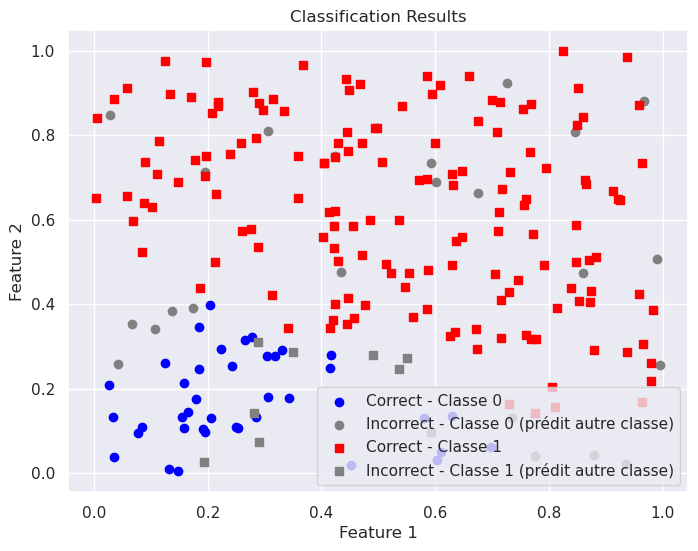

Matrice de confusion :
 [[ 39  23]
 [  9 154]]
Précision du modèle : 0.8577777777777778


0.8577777777777778

In [8]:
knn20 = KNeighborsClassifier(n_neighbors=20)
evaluate(knn20, X_train, X_test, Y_train, Y_test, display=True)

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate(clf, X_train, X_test, y_train, y_test, display=False):
    # Fit model on trainset
    clf.fit(X_train, y_train)
    # Predict on testset
    y_pred = clf.predict(X_test)
    # Compute accuracy score
    score = accuracy_score(y_test, y_pred)

    if display:
        # Print score
        print(f'Model: {clf.__class__.__name__}, Accuracy: {score}')

        fig, axes = plt.subplots(1, 2, figsize=(15, 5))

        # Plot y_test vs y_pred
        y_pred_bis = y_pred.copy()
        error = y_test != y_pred
        y_pred_bis[error] = -1
        sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_pred_bis, palette="deep", ax=axes[0]).set(xlabel="X1", ylabel="X2")
        
        # Plot confusion matrix
        disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, ax=axes[1])
        
        plt.show()

    return score

Model: KNeighborsClassifier, Accuracy: 0.8555555555555555


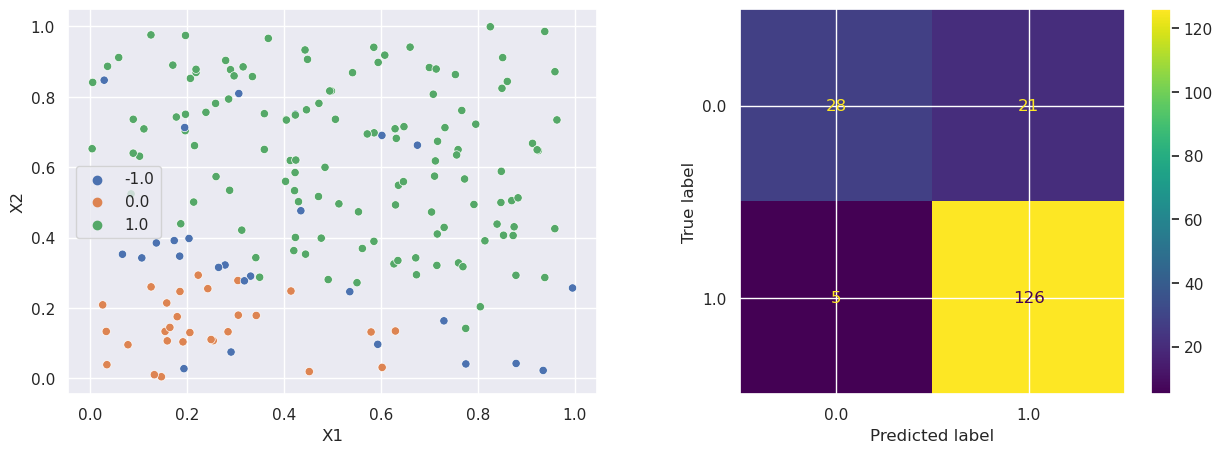

0.8555555555555555

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.60, random_state=42)
knn20 = KNeighborsClassifier(n_neighbors=20)
evaluate(knn20, X_train, X_test, Y_train, Y_test, display=True)

# Question 9

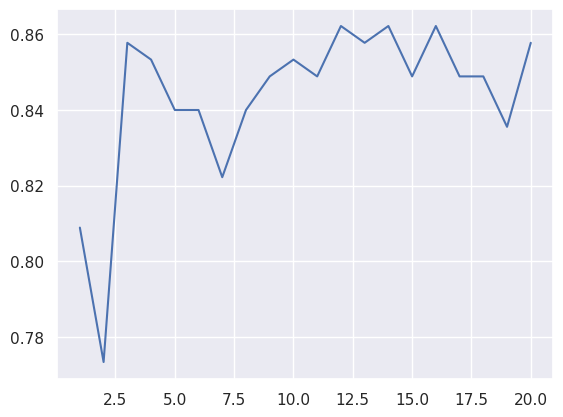

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.75, random_state=42)
n = range(1, 21)
clfs = [KNeighborsClassifier(n_neighbors=k) for k in n]
## Afficher le graphe de l'évolution de l'accuracy
y=[]
for clf in clfs:
    y.append(evaluate(clf, X_train, X_test, Y_train, Y_test))
plt.plot(np.arange(1,21),y)

In [12]:
print("Best estimator:", KNeighborsClassifier(n_neighbors=y.index(max(y))+1))

Best estimator: KNeighborsClassifier(n_neighbors=12)


# Question 11

### LOO

In [13]:
print("Mean score:", np.mean(y))

Mean score: 0.8435555555555554


### 5-fold

In [14]:
##Utiliser GridSearchcv
parameters = {'n_neighbors':range(1, 21)}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters)
clf.fit(X_train, Y_train)
print(f"Best parameters: {clf.best_params_} with mean score of {round(clf.best_score_,3)}")

Best parameters: {'n_neighbors': 20} with mean score of 0.867


Exercice : tester avec d'autres métriques, voir https://scikit-learn.org/stable/modules/model_evaluation.html#scoring

# Question 12

In [15]:
final_clf = clf.best_estimator_
final_clf.fit(X_test, Y_test)
Y_pred = final_clf.predict(X_test)
print("Final accuracy score:", accuracy_score(Y_test, Y_pred))

Final accuracy score: 0.88


In [16]:
clf.cv_results_

{'mean_fit_time': array([0.0007544 , 0.00061789, 0.00042305, 0.0003252 , 0.00028009,
        0.00023746, 0.0002213 , 0.00022221, 0.00022178, 0.0002223 ,
        0.00023389, 0.00022593, 0.00022259, 0.00022674, 0.00022664,
        0.0002317 , 0.00023232, 0.00022578, 0.00022664, 0.00023146]),
 'std_fit_time': array([8.56506791e-05, 5.25474981e-05, 4.25798762e-05, 2.45656767e-05,
        2.50134611e-05, 8.14680157e-06, 1.20064529e-06, 1.05552405e-06,
        1.08106461e-06, 1.80065227e-06, 1.10550147e-05, 3.62709813e-06,
        6.32595976e-07, 1.02270177e-06, 1.02934995e-06, 3.84852195e-06,
        8.19077998e-06, 6.57274664e-07, 1.16410786e-06, 2.64375997e-06]),
 'mean_score_time': array([0.00193696, 0.00167437, 0.00118861, 0.00088024, 0.0007422 ,
        0.00066099, 0.00063515, 0.0006424 , 0.00062394, 0.00062771,
        0.00063257, 0.00062375, 0.00064621, 0.00064864, 0.00065618,
        0.00064259, 0.00064106, 0.00065207, 0.00066128, 0.00064397]),
 'std_score_time': array([1.61826013e-

> Le score final est logiquement proche du score moyen de validation car les échantillon d'entrainement et de test ont été généré avec les mêmes lois.